In [1]:
from sklearn.datasets import load_boston
boston = load_boston()
boston.data


array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
        4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
        9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
        4.0300e+00],
       ...,
       [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        5.6400e+00],
       [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
        6.4800e+00],
       [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        7.8800e+00]])

In [0]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np
 
scaler = MinMaxScaler()
x = scaler.fit_transform(boston.data)
 
aux = boston.target.reshape(boston.target.shape[0], 1)
y = scaler.fit_transform(aux)


In [3]:
from sklearn.model_selection import train_test_split
 
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, shuffle=False)
print('Shape of x_train {}'.format(x_train.shape))
print('Shape of y_train {}'.format(y_train.shape))
print('Shape of x_test {}'.format(x_test.shape))
print('Shape of y_test {}'.format(y_test.shape))


Shape of x_train (404, 13)
Shape of y_train (404, 1)
Shape of x_test (102, 13)
Shape of y_test (102, 1)


In [4]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense
tf.set_random_seed(1)


Using TensorFlow backend.


In [5]:
model = Sequential()
 
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1))
 
model.compile(loss='mean_squared_error', optimizer='adam')


Instructions for updating:
Colocations handled automatically by placer.


In [6]:
history = model.fit(x_train, y_train, batch_size=32, epochs=5, verbose=2)

Instructions for updating:
Use tf.cast instead.
Epoch 1/5
 - 1s - loss: 0.1098
Epoch 2/5
 - 0s - loss: 0.0569
Epoch 3/5
 - 0s - loss: 0.0364
Epoch 4/5
 - 0s - loss: 0.0277
Epoch 5/5
 - 0s - loss: 0.0241


In [7]:
error = model.evaluate(x_test, y_test)
print('MSE: {:.5f}'.format(error))


102/102 [==============================] - 0s 353us/step
MSE: 0.01253


Prediction shape: (102, 1)


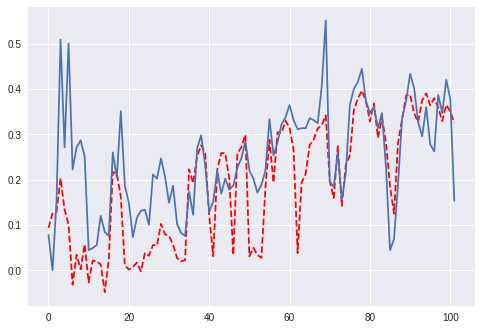

In [8]:
import matplotlib.pyplot as plt
 
prediction = model.predict(x_test)
print('Prediction shape: {}'.format(prediction.shape))
 
plt.plot(range(len(x_test)), prediction.reshape(prediction.shape[0]), '--r')
plt.plot(range(len(y_test)), y_test)
plt.show()
